In [37]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline


In [36]:
#sklearn implementation of the Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#Standard Scaler
from sklearn.preprocessing import StandardScaler

#Train Test Split


In [38]:
from sklearn.model_selection import train_test_split

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


### Explore the Dataset

In [4]:
df = pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\angelo avila - insurance_claims.csv")
df

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,100/300,1000,1137.03,0,MALE,Associate,tech-support,base-jumping,unmarried,0,0,Multi-vehicle Collision,Front Collision,Total Loss,Police,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,100/300,500,1442.99,0,FEMALE,PhD,other-service,golf,own-child,0,0,Single Vehicle Collision,Front Collision,Total Loss,Police,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,camping,wife,0,-39300,Single Vehicle Collision,Rear Collision,Total Loss,Other,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [5]:
df.describe(include="all")

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.00,1000.00,1000.00,1000,1000.00,1000.00,1000.00,1000,1000,1000,1000,1000,1000.00,1000.00,1000,1000,1000,1000,1000.00,1000.00,1000,1000.00,1000.00,1000,1000.00,1000.00,1000.00,1000.00,1000,1000,1000.00,1000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,2,7,14,20,6,NaN,NaN,4,4,4,5,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,NaN,250/500,NaN,NaN,NaN,FEMALE,JD,machine-op-inspct,reading,own-child,NaN,NaN,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NaN,NaN,?,NaN,NaN,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N
freq,NaN,NaN,NaN,351,NaN,NaN,NaN,537,161,93,64,183,NaN,NaN,419,292,354,292,NaN,NaN,360,NaN,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.95,38.95,546238.65,NaN,1136.00,1256.41,1101000.00,NaN,NaN,NaN,NaN,NaN,25126.10,-26793.70,NaN,NaN,NaN,NaN,11.64,1.84,NaN,0.99,1.49,NaN,52761.94,7433.42,7399.57,37928.95,NaN,NaN,2005.10,NaN
std,115.11,9.14,257063.01,NaN,611.86,244.17,2297406.60,NaN,NaN,NaN,NaN,NaN,27872.19,28104.10,NaN,NaN,NaN,NaN,6.95,1.02,NaN,0.82,1.11,NaN,26401.53,4880.95,4824.73,18886.25,NaN,NaN,6.02,NaN
min,0.00,19.00,100804.00,NaN,500.00,433.33,-1000000.00,NaN,NaN,NaN,NaN,NaN,0.00,-111100.00,NaN,NaN,NaN,NaN,0.00,1.00,NaN,0.00,0.00,NaN,100.00,0.00,0.00,70.00,NaN,NaN,1995.00,NaN
25%,115.75,32.00,335980.25,NaN,500.00,1089.61,0.00,NaN,NaN,NaN,NaN,NaN,0.00,-51500.00,NaN,NaN,NaN,NaN,6.00,1.00,NaN,0.00,1.00,NaN,41812.50,4295.00,4445.00,30292.50,NaN,NaN,2000.00,NaN
50%,199.50,38.00,533135.00,NaN,1000.00,1257.20,0.00,NaN,NaN,NaN,NaN,NaN,0.00,-23250.00,NaN,NaN,NaN,NaN,12.00,1.00,NaN,1.00,1.00,NaN,58055.00,6775.00,6750.00,42100.00,NaN,NaN,2005.00,NaN
75%,276.25,44.00,759099.75,NaN,2000.00,1415.70,0.00,NaN,NaN,NaN,NaN,NaN,51025.00,0.00,NaN,NaN,NaN,NaN,17.00,3.00,NaN,2.00,2.00,NaN,70592.50,11305.00,10885.00,50822.50,NaN,NaN,2010.00,NaN


In [6]:
#Get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [39]:
df.incident_severity.value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

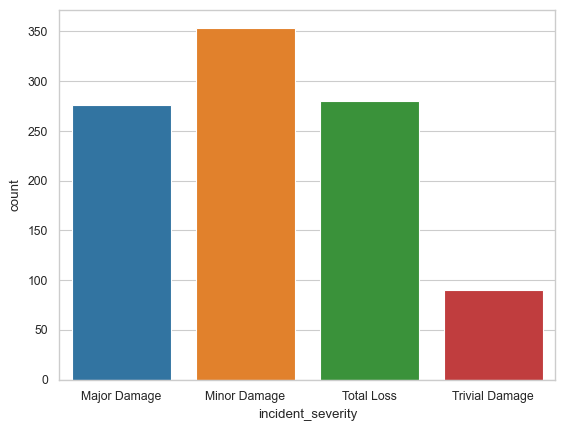

In [40]:
sns.countplot(data = df, x = "incident_severity")

In [42]:
df

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,100/300,1000,1137.03,0,MALE,Associate,tech-support,base-jumping,unmarried,0,0,Multi-vehicle Collision,Front Collision,Total Loss,Police,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,100/300,500,1442.99,0,FEMALE,PhD,other-service,golf,own-child,0,0,Single Vehicle Collision,Front Collision,Total Loss,Police,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,camping,wife,0,-39300,Single Vehicle Collision,Rear Collision,Total Loss,Other,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [45]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim           

In [43]:
df.drop(['auto_model','auto_make','policy_csl'],axis=1,inplace=True)

In [46]:
cat_cols = ['insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','fraud_reported','police_report_available','property_damage','collision_type','authorities_contacted']
df1 = pd.get_dummies(df,columns = cat_cols)

### Pre Processing

In [47]:
#Separate the Features and the Target Variable
x = df1.drop(["incident_severity"], axis=1)
y = df1["incident_severity"]

In [48]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

In [49]:
#NOTE: Only scale the predictor variables, NOT the target variable

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

### Training the Model

In [50]:
#Instantiate the Algorithm 
gnb = GaussianNB()

#Train the model
gnb.fit(x_train_scaled,y_train)


GaussianNB()

### Validate the model

In [51]:
#Predict on the Test Set
y_pred = gnb.predict(x_test_scaled)

y_pred


array(['Total Loss', 'Total Loss', 'Total Loss', 'Total Loss',
       'Major Damage', 'Total Loss', 'Major Damage', 'Trivial Damage',
       'Total Loss', 'Total Loss', 'Major Damage', 'Total Loss',
       'Total Loss', 'Total Loss', 'Major Damage', 'Major Damage',
       'Major Damage', 'Trivial Damage', 'Total Loss', 'Major Damage',
       'Major Damage', 'Major Damage', 'Major Damage', 'Total Loss',
       'Trivial Damage', 'Total Loss', 'Total Loss', 'Trivial Damage',
       'Total Loss', 'Trivial Damage', 'Major Damage', 'Major Damage',
       'Major Damage', 'Total Loss', 'Total Loss', 'Total Loss',
       'Total Loss', 'Major Damage', 'Total Loss', 'Total Loss',
       'Major Damage', 'Major Damage', 'Total Loss', 'Major Damage',
       'Major Damage', 'Major Damage', 'Total Loss', 'Trivial Damage',
       'Trivial Damage', 'Total Loss', 'Total Loss', 'Major Damage',
       'Trivial Damage', 'Total Loss', 'Trivial Damage', 'Trivial Damage',
       'Trivial Damage', 'Major Damage

In [52]:
#Check performance metrics
print("Accuracy: {:.2%}".format(accuracy_score(y_test,y_pred)))

Accuracy: 43.20%


In [53]:
print(classification_report(y_test,y_pred))


                precision    recall  f1-score   support

  Major Damage       0.51      0.69      0.59        68
  Minor Damage       0.00      0.00      0.00        92
    Total Loss       0.38      0.60      0.47        68
Trivial Damage       0.42      0.91      0.57        22

      accuracy                           0.43       250
     macro avg       0.33      0.55      0.41       250
  weighted avg       0.28      0.43      0.34       250



In [54]:
print (confusion_matrix(y_test, y_pred))

[[47  0 21  0]
 [18  0 46 28]
 [27  0 41  0]
 [ 0  2  0 20]]


In [55]:
#Get probabilities
y_prob_df = pd.DataFrame(gnb.predict_proba(x_test_scaled), index=x_test.index, columns=gnb.classes_)

In [56]:
gnb.classes_

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype='<U14')

In [57]:
y_prob_df

,Major Damage,Minor Damage,Total Loss,Trivial Damage
923,0.00,0.00,1.00,0.00
921,0.14,0.00,0.86,0.00
516,0.06,0.00,0.94,0.00
87,0.03,0.00,0.97,0.00
879,0.70,0.00,0.30,0.00
463,0.00,0.00,1.00,0.00
112,1.00,0.00,0.00,0.00
297,0.00,0.00,0.00,1.00
417,0.00,0.00,1.00,0.00
658,0.02,0.00,0.98,0.00


In [58]:
#View original test dataset with results for easier analysis
df_results = x_test.copy()
df_results['Class'] = y_test
df_results['Predicted'] = y_pred
new_df = df_results.join(y_prob_df)

new_df.head(10)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,fraud_reported_N,fraud_reported_Y,police_report_available_?,police_report_available_NO,police_report_available_YES,property_damage_?,property_damage_NO,property_damage_YES,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,Class,Predicted,Major Damage,Minor Damage,Total Loss,Trivial Damage
923,90,31,524215,2000,951.27,0,42100,0,2,1,1,0,75790,13780,6890,55120,2007,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,Total Loss,Total Loss,0.00,0.00,1.00,0.00
921,178,38,987524,500,1381.14,0,0,0,10,3,0,3,57200,5200,10400,41600,2011,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,Minor Damage,Total Loss,0.14,0.00,0.86,0.00
516,65,27,538955,1000,1164.97,0,43000,-42500,17,1,1,2,42840,3570,7140,32130,2004,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,Total Loss,Total Loss,0.06,0.00,0.94,0.00
87,134,32,614763,500,1612.43,0,36400,0,2,1,2,1,64240,11680,11680,40880,2015,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,Total Loss,Total Loss,0.03,0.00,0.97,0.00
879,338,47,884180,500,1143.46,4000000,0,0,4,1,2,1,58560,9760,9760,39040,2002,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,Total Loss,Major Damage,0.70,0.00,0.30,0.00
463,218,41,461962,500,914.22,0,37900,-72900,14,3,2,0,84590,15380,7690,61520,2013,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,Total Loss,Total Loss,0.00,0.00,1.00,0.00
112,210,41,395269,500,1222.75,0,0,-41000,12,3,2,0,81070,14740,14740,51590,2001,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,